#**Question 1**



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split

## **Load Data**

In [0]:
def load_data(path, batch_id):
    with open(path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
    features = batch['data']
    # features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
    return features, labels

In [0]:
f="/content/drive/My Drive/Datasets/Question-1/cifar-10-python/cifar-10-batches-py";
feature,label =[],[]
temp1=[]
temp2=[]
for i in range(1,6):
  temp1,temp2=load_data(f,i)
  feature.append(temp1)
  label.append(temp2)

In [0]:
train=[]
lab=[]
for i in range(len(feature)):
  for j in range(len(feature[i])):
    train.append(feature[i][j])
    lab.append(label[i][j])
train=np.array(train)
lab=np.array(lab)

In [6]:
print(lab.shape)
print(train.shape)

(50000,)
(50000, 3072)


## **Data prepossessing (PCA) / Split data into train and test**

In [27]:
from sklearn.decomposition import PCA
train=PCA(.60).fit_transform(train)
X_train, X_test, y_train, y_test = train_test_split(train,lab, test_size=0.33, random_state=42)
print(X_train.shape)

(33500, 3072)


## **LinearSVM in different C value**

### **C = 0.1**

In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
clf=LinearSVC(C=0.1,dual=False)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
pred_labels = prediction == y_test
acc=0.0
for i in pred_labels:
    if i==True:
        acc+=1
print('SVM accuracy=',(acc)/len(pred_labels)*100,'%')
print(classification_report(y_test,prediction,labels=np.unique(prediction)))
from sklearn.metrics import f1_score

print(f1_score(y_test,prediction,average='macro'))
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,prediction))

SVM accuracy= 28.224242424242423 %
              precision    recall  f1-score   support

           0       0.33      0.43      0.38      1628
           1       0.23      0.17      0.19      1614
           2       0.26      0.03      0.06      1645
           3       0.17      0.02      0.03      1693
           4       0.21      0.11      0.14      1582
           5       0.28      0.39      0.33      1694
           6       0.23      0.50      0.32      1599
           7       0.29      0.16      0.21      1662
           8       0.35      0.56      0.43      1692
           9       0.29      0.44      0.35      1691

    accuracy                           0.28     16500
   macro avg       0.26      0.28      0.24     16500
weighted avg       0.27      0.28      0.24     16500

0.24385111560271588
[[707  67   5   6  17  67  81  25 431 222]
 [179 269  11  18  76  86 201  38 348 388]
 [266 134  57  19  87 213 522  85 136 126]
 [153 119  34  29  96 511 361 141  87 162]
 [125  97  19 

### **C = 0.01**

In [12]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
clf=LinearSVC(C=0.01,dual=False)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
pred_labels = prediction == y_test
acc=0.0
for i in pred_labels:
    if i==True:
        acc+=1
print('SVM accuracy=',(acc)/len(pred_labels)*100,'%')
print(classification_report(y_test,prediction,labels=np.unique(prediction)))
from sklearn.metrics import f1_score

print(f1_score(y_test,prediction,average='macro'))
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,prediction))

SVM accuracy= 28.242424242424242 %
              precision    recall  f1-score   support

           0       0.33      0.43      0.38      1628
           1       0.23      0.17      0.19      1614
           2       0.26      0.03      0.06      1645
           3       0.17      0.02      0.03      1693
           4       0.21      0.11      0.14      1582
           5       0.28      0.39      0.33      1694
           6       0.23      0.50      0.32      1599
           7       0.29      0.16      0.21      1662
           8       0.35      0.56      0.43      1692
           9       0.29      0.44      0.35      1691

    accuracy                           0.28     16500
   macro avg       0.27      0.28      0.24     16500
weighted avg       0.27      0.28      0.24     16500

0.24397584157364882
[[708  66   5   6  17  67  81  25 431 222]
 [179 269  11  18  76  86 201  38 348 388]
 [265 134  57  19  85 213 523  86 137 126]
 [154 119  34  29  95 511 361 141  87 162]
 [125  97  19 

### **C = 1**

In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
clf=LinearSVC(C=1,dual=False)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
pred_labels = prediction == y_test
acc=0.0
for i in pred_labels:
    if i==True:
        acc+=1
print('SVM accuracy=',(acc)/len(pred_labels)*100,'%')
print(classification_report(y_test,prediction,labels=np.unique(prediction)))
from sklearn.metrics import f1_score

print(f1_score(y_test,prediction,average='macro'))
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,prediction))

SVM accuracy= 28.224242424242423 %
              precision    recall  f1-score   support

           0       0.33      0.43      0.38      1628
           1       0.23      0.17      0.19      1614
           2       0.26      0.03      0.06      1645
           3       0.17      0.02      0.03      1693
           4       0.21      0.11      0.14      1582
           5       0.28      0.39      0.33      1694
           6       0.23      0.50      0.32      1599
           7       0.29      0.16      0.21      1662
           8       0.35      0.56      0.43      1692
           9       0.29      0.44      0.35      1691

    accuracy                           0.28     16500
   macro avg       0.26      0.28      0.24     16500
weighted avg       0.27      0.28      0.24     16500

0.2438542533838191
[[707  67   5   6  17  67  81  25 430 223]
 [179 269  11  18  76  86 201  38 348 388]
 [266 134  57  19  87 213 522  85 136 126]
 [153 119  34  29  96 511 361 141  87 162]
 [125  97  19  

### **C = 10**

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
clf=LinearSVC(C=10,dual=False)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
pred_labels = prediction == y_test
acc=0.0
for i in pred_labels:
    if i==True:
        acc+=1
print('SVM accuracy=',(acc)/len(pred_labels)*100,'%')
print(classification_report(y_test,prediction,labels=np.unique(prediction)))
from sklearn.metrics import f1_score

print(f1_score(y_test,prediction,average='macro'))
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,prediction))

SVM accuracy= 28.224242424242423 %
              precision    recall  f1-score   support

           0       0.33      0.43      0.38      1628
           1       0.23      0.17      0.19      1614
           2       0.26      0.03      0.06      1645
           3       0.17      0.02      0.03      1693
           4       0.21      0.11      0.14      1582
           5       0.28      0.39      0.33      1694
           6       0.23      0.50      0.32      1599
           7       0.29      0.16      0.21      1662
           8       0.35      0.56      0.43      1692
           9       0.29      0.44      0.35      1691

    accuracy                           0.28     16500
   macro avg       0.26      0.28      0.24     16500
weighted avg       0.27      0.28      0.24     16500

0.2438542533838191
[[707  67   5   6  17  67  81  25 430 223]
 [179 269  11  18  76  86 201  38 348 388]
 [266 134  57  19  87 213 522  85 136 126]
 [153 119  34  29  96 511 361 141  87 162]
 [125  97  19  

### **C = 100**

In [15]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
clf=LinearSVC(C=100,dual=False)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
pred_labels = prediction == y_test
acc=0.0
for i in pred_labels:
    if i==True:
        acc+=1
print('SVM accuracy=',(acc)/len(pred_labels)*100,'%')
print(classification_report(y_test,prediction,labels=np.unique(prediction)))
from sklearn.metrics import f1_score

print(f1_score(y_test,prediction,average='macro'))
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,prediction))

SVM accuracy= 28.224242424242423 %
              precision    recall  f1-score   support

           0       0.33      0.43      0.38      1628
           1       0.23      0.17      0.19      1614
           2       0.26      0.03      0.06      1645
           3       0.17      0.02      0.03      1693
           4       0.21      0.11      0.14      1582
           5       0.28      0.39      0.33      1694
           6       0.23      0.50      0.32      1599
           7       0.29      0.16      0.21      1662
           8       0.35      0.56      0.43      1692
           9       0.29      0.44      0.35      1691

    accuracy                           0.28     16500
   macro avg       0.26      0.28      0.24     16500
weighted avg       0.27      0.28      0.24     16500

0.2438542533838191
[[707  67   5   6  17  67  81  25 430 223]
 [179 269  11  18  76  86 201  38 348 388]
 [266 134  57  19  87 213 522  85 136 126]
 [153 119  34  29  96 511 361 141  87 162]
 [125  97  19  

### **Data train using KNN**

In [0]:
import pandas as pd
import numpy as np
class KNNClassifier:
    def __init__(self,n=3):
        self.k=n
        self.train_d=None
        self.train_l=None
        self.test_d=None
    def E(self):
      m=0
      result=[]
      for j in self.test_d:
        m=0
        dist=[]
        for i in self.train_d:
          dist.append([np.linalg.norm(i-j),m])
          m=m+1
        dist=sorted(dist)
        re=[]
        for l in range(self.k):
          re.append(int(self.train_l[dist[l][1]]))
        result.append(max(set(re), key = re.count))
      return result
    
    def predict(self,data):
        self.test_d=data
        result=self.E()
        return result
    
    
    def train(self,data,label):
        self.train_d=data
        self.train_l=label

In [17]:
knn_classifier = KNNClassifier()
knn_classifier.train(X_train,y_train)
predictions = knn_classifier.predict(X_test)

prediction=clf.predict(X_test)
pred_labels = prediction == y_test
acc=0.0
for i in pred_labels:
    if i==True:
        acc+=1
print('KNN accuracy=',(acc)/len(pred_labels)*100,'%')
print(classification_report(y_test,prediction,labels=np.unique(prediction)))
from sklearn.metrics import f1_score

print(f1_score(y_test,prediction,average='macro'))
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,prediction))

KNN accuracy= 28.224242424242423 %
              precision    recall  f1-score   support

           0       0.33      0.43      0.38      1628
           1       0.23      0.17      0.19      1614
           2       0.26      0.03      0.06      1645
           3       0.17      0.02      0.03      1693
           4       0.21      0.11      0.14      1582
           5       0.28      0.39      0.33      1694
           6       0.23      0.50      0.32      1599
           7       0.29      0.16      0.21      1662
           8       0.35      0.56      0.43      1692
           9       0.29      0.44      0.35      1691

    accuracy                           0.28     16500
   macro avg       0.26      0.28      0.24     16500
weighted avg       0.27      0.28      0.24     16500

0.2438542533838191
[[707  67   5   6  17  67  81  25 430 223]
 [179 269  11  18  76  86 201  38 348 388]
 [266 134  57  19  87 213 522  85 136 126]
 [153 119  34  29  96 511 361 141  87 162]
 [125  97  19  

### **Support Vector and Support Image**

[20 25 32 ... 52 41 32]
[ 96  32  43 ... 102 114 117]
[ 85 128 126 ...  39  66  62]
[24 50 58 ... 27 29 28]
[151 150 152 ... 175 170 155]


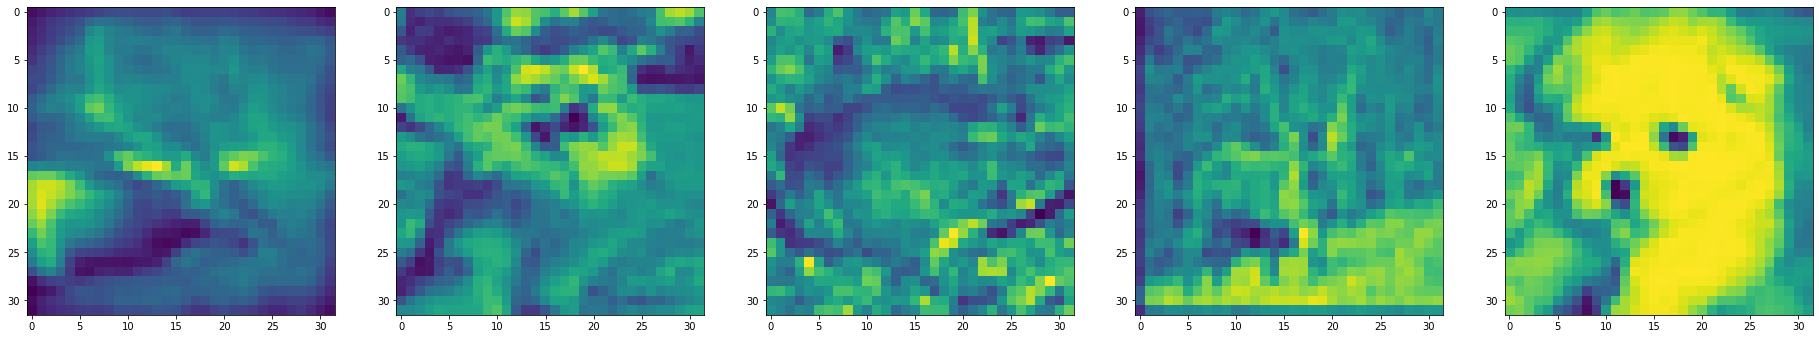

In [47]:
from sklearn import linear_model
import matplotlib.pyplot as plt
clf = linear_model.SGDClassifier(max_iter=100000,n_jobs=-1)
clf.fit(X_train, y_train)
fig = plt.figure(figsize=(32, 32))
ind = 1
for i in X_test:
    for c in clf.coef_:
        if abs(np.dot(c,i)) <= 1:
            print(i)
            fig.add_subplot(4,5,ind)
            plt.imshow(i[:1024].reshape(32,32))
            ind += 1
plt.show()